# Selective Learning analytics (80 points)
• dataset: NBoption.csv

• Visualize OTM, ITM, and ATM by using PCA, t-SNE and UMAP

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [32]:
#Labeling for the Biplot
def doLabel(data):
    label=[]
    
    itm = (data['StockPrice'] > data['Strike'])
    label.append(itm)
    
    atm = data['StockPrice'] == data['Strike']
    label.append(atm)
    
    itm = (data['StockPrice'] < data['Strike'])
    label.append(itm)
    
    label_name=['down', 'equal', 'itm']
    
    return label, label_name

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def doNormalization(data, normalization_bit = 1):
  if normalization_bit:
    normalized_data = StandardScaler().fit_transform(data)
  else:
    normalized_data=MinMaxScaler().fit_transform(data)
  return normalized_data

In [34]:
#PCA
from sklearn.decomposition import PCA

def doPCA(data):
    normalized_data = doNormalization(data,1) #StandardScaler
    pca = PCA()
    pcaNewData=pca.fit_transform(normalized_data)
    evr = pca.explained_variance_ratio_
    
    #return pcaNewData
    return pcaNewData, evr

In [35]:
#TSNE
from sklearn.manifold import TSNE

def doTSNE (data, perplexity, init):
    normalized_data = doNormalization(data,1) #StandardScaler normalization
    tsne = TSNE(perplexity=perplexity, init=init)
    newData = tsne.fit_transform(normalized_data)
    #evr = evr.explained_variance_ratio_
    
    #return newData, evr
    return newData

In [36]:
#UMAP
import umap.umap_ as umap

def doUMAP(df):
    return umap.UMAP(n_neighbors=10,min_dist=0.1,metric='euclidean',init='random').fit_transform(StandardScaler().fit_transform(df))

In [37]:
def biplot(newData, label, label_name, Method):

  marker_list=['o','p','d','s', '>']
  c_list=['b','gold', 'y', 'lightblue', 'deepblue']
  e_list=['k','g', 'b', 'r', 'orange']
  for i in range(len(label)):
    plt.scatter(newData[label[i], 0], newData[label[i], 1], label=label_name[i],
                marker=marker_list[i], color=c_list[i], edgecolors=e_list[i],  s=75)

  plt.legend(prop={'size':12})

  if Method=='pca' or Method=='PCA':
    plt.ylabel('$PC_{2}$')
  elif Method=='spca':
    plt.xlabel('$SPC_{1}$')
    plt.ylabel('$SPC_{2}$')
  else:
    plt.xlabel('$'+ Method +'_{1}'+'$')
    plt.ylabel('$'+ Method +'_{2}'+'$')
  
  plt.grid('on')

In [38]:
data = pd.read_csv("NBoption.csv")
#print (nbop_data)
data = data[["Ask","Bid", "LastPrice", "StockPrice", "Strike" ,
            "Volatility", "Volume", "time_to_maturity", "ImpliedVolatility"]]

data.head(5)

,Ask,Bid,LastPrice,StockPrice,Strike,Volatility,Volume,time_to_maturity,ImpliedVolatility
0,0.10,0.0,0.11,79.40,30.0,0.284654,22,0.128767,1.242191
1,0.25,0.0,0.10,71.86,35.0,0.400073,61,0.090411,1.173832
2,1.80,0.0,0.40,79.40,40.0,0.284654,5,0.128767,1.442386
3,0.20,0.0,0.09,79.54,45.0,0.286563,4,0.123288,0.763674
4,0.15,0.0,0.10,72.10,50.0,0.396490,1,0.095890,0.578129


In [39]:
label, label_name = doLabel(data)

print('ITM:', np.sum(label[0]), 'ATM:', np.sum(label[1]), 'OTM:', np.sum(label[2]))

ITM: 7834 ATM: 22 OTM: 6397


In [40]:
#PCA
pca_data, evr = doPCA(data)
pca_data

array([[-0.92590843,  0.74093215,  0.89584218, ...,  0.46796916,
        -0.4023564 ,  0.01736986],
       [-0.9172653 ,  0.79056736,  1.10867828, ...,  0.32251278,
        -0.29030224,  0.0088419 ],
       [-0.7953597 ,  0.85814459,  1.11852725, ...,  0.36181603,
        -0.26644159, -0.06740426],
       ...,
       [-0.97273156,  0.45540319, -1.10854013, ..., -0.12009805,
         0.21074075,  0.01046767],
       [-1.51428663,  2.58376123,  1.1686112 , ..., -0.15222374,
         0.08271653,  0.00570306],
       [-1.25544275,  1.9449769 ,  0.11930681, ..., -0.07891427,
         0.0685525 , -0.01905327]])

In [41]:
evr

array([3.77986768e-01, 1.96631939e-01, 1.27949314e-01, 1.10256439e-01,
       9.80151541e-02, 6.67663255e-02, 1.19350427e-02, 1.03084221e-02,
       1.50595191e-04])

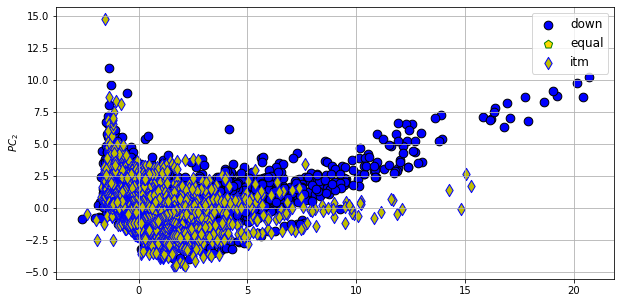

In [42]:
#PCA biplot

fig = plt.figure(figsize=(10,5))
biplot(pca_data, label, label_name, 'pca')
plt.savefig('NBOp_PCA_Biplot.png')

In [43]:
#TSNE
tsne_data = doTSNE(data, 50, 'random') #perplexity = 50, init = random
tsne_data

array([[ -4.9394426, -37.65621  ],
       [ -4.753871 , -37.96631  ],
       [ -3.8842244, -38.349308 ],
       ...,
       [ 25.872868 ,   2.9661522],
       [ 30.647326 ,  37.3095   ],
       [ 38.687523 ,  27.313686 ]], dtype=float32)

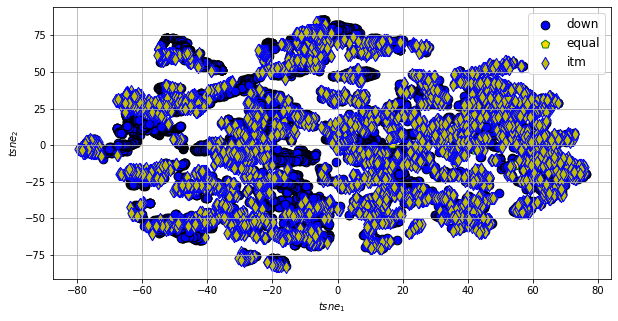

In [44]:
#TSNE biplot
plt.figure(figsize=(10,5))
biplot(tsne_data, label, label_name, 'tsne')
plt.savefig('NBOp_tsne_Biplot.png')

In [45]:
umap_data = doUMAP(data)
umap_data

array([[ 5.9795513,  9.503819 ],
       [ 5.9958096,  9.489823 ],
       [ 6.0542116,  9.471424 ],
       ...,
       [ 2.3077478,  8.121373 ],
       [12.66489  ,  7.0220942],
       [10.091892 ,  7.5623207]], dtype=float32)

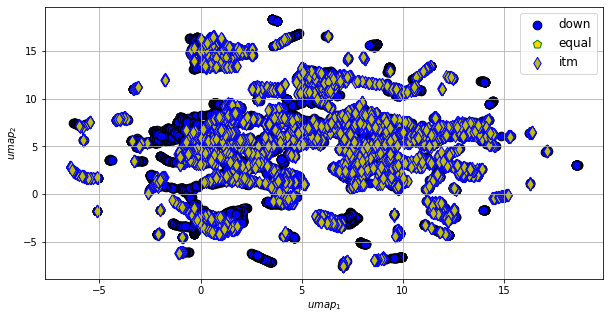

In [46]:
#UMAP biplot
plt.figure(figsize=(10,5))
biplot(umap_data, label, label_name, 'umap')
plt.savefig('NBOp_UMAP_Biplot.png')

# Revisit Credit Risk Analytics (I) (40 points)

• Credit risk analytics is key in personal loan decision making for banks. Using credit risk analytics, banks are able to analyze previous lending data, along with associated default rates, to create an effective predictive model in loan decision making.
• The file credit_risk_small_data_0.02.csv has 2405 credit records with the following variables
– ’Index’: case number
– ’Delinquency’: this is a binary variable 1: means bad credit and 0: means
good credit
– ’Revolving Credit Percentage’,
– ’Capital Reserves’,
– ’Num Late 60’,
– ’Debt Ratio’
– ’Monthly Income’ ($) 
– ’Num Credit Lines’ ($1000)
– ’Num Late Past 90’,
– ’Num Real Estate’,
– ’Num Late 90’,
– ’Num Employees’ (should not be more than 10 for a personal credit analytics)
1. Visualize data at least using t-SNE
2. Partition data as 80% for training and 20% for testing and use K-NN and SVM, to conduct credit risk analytics, 
i.e. do classification to determine good or bad credit records.
3. Compute all classification measures and F1-measure
4. Find all samples in ’TP’/’TN’/’FP’/’FN’ class
(a) TP class: the positive samples that are correctly predicted 
(b) TN class: the negative samples that are correctly predicted
(c) FP class: the negative samples that are falsely predicted 
(d) FN class: the positive samples that are falsely predicted
5. Develp your own method to overcome the imbalance issue (extra credits 20 points)

In [47]:
credit_risk_data = pd.read_csv("credit_risk_small_data_0.02.csv") #import the dataset into a pandas dataframe
credit_risk_data

,Delinquency,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
0,0,0.390912,53,0,0.241776,10000,9,0,1,0,2
1,0,0.037574,64,0,0.323588,10500,11,0,2,0,0
2,0,0.002058,59,0,0.458093,16500,12,0,2,0,2
3,0,1.023988,36,0,0.203108,2766,4,0,0,0,3
4,0,0.966603,61,1,0.350550,3000,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2400,0,0.058012,35,0,0.348095,4041,8,0,2,0,3
2401,0,0.024283,91,2,0.118773,5800,7,0,1,0,0
2402,0,0.271156,37,1,0.343996,9127,17,0,1,0,1
2403,0,0.923689,35,0,1.890141,2129,9,0,2,0,0


In [48]:
def doLabel(data):
    label=[]
    
    good = (data['Delinquency'] == 0)
    label.append(good)
    
    bad = (data['Delinquency'] == 1)
    label.append(good)
    
    label_name=['good', 'bad']
    
    return label, label_name

In [49]:
#label the data
label, label_name = doLabel(credit_risk_data)

print('Good:', np.sum(label[0]), 'Bad:', np.sum(label[1]))

Good: 2248 Bad: 2248


In [50]:
#TSNE
credit_tsne = doTSNE(credit_risk_data, 50, 'random') #perplexity = 50, init = random
credit_tsne
#print ('EVR = ',evr)

array([[-23.537676 , -13.812006 ],
       [ -5.231355 ,  19.532698 ],
       [-24.815184 ,   2.578851 ],
       ...,
       [ -9.521314 , -11.509543 ],
       [  2.409323 ,   2.8977807],
       [ 30.034523 , -18.579147 ]], dtype=float32)

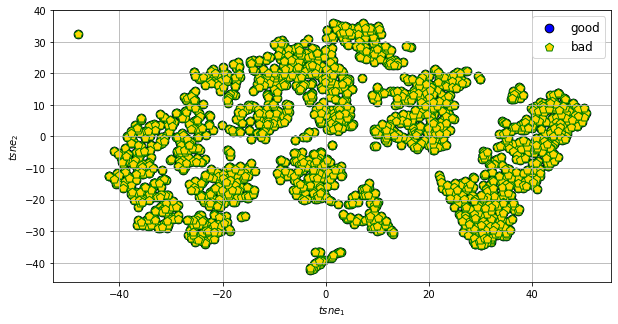

In [51]:
#Biplot for TSNE
plt.figure(figsize=(10,5))
biplot(credit_tsne, label, label_name, 'tsne')
plt.savefig ('credit_tsne_biplot.png')

In [52]:
#KNN

from sklearn.neighbors import KNeighborsRegressor

data = credit_risk_data[["Revolving Credit Percentage","Capital Reserves",
                         "Num Late 60","Debt Ratio","Monthly Income",
                         "Num Credit Lines","Num Late Past 90",
                         "Num Real Estate","Num Late 90","Num Employees"]]
#print (df.head(5))

label = credit_risk_data[["Delinquency"]] #separating the label
#print (label)

kNN = KNeighborsRegressor(n_neighbors=5, weights='distance', 
                          algorithm='auto')

#Data standardization
data = (data - data.mean()) / data.std()
test_percent = 0.2 #80-20 split

In [55]:
from sklearn.model_selection import train_test_split
def kNN_Credit_Risk(training_data, training_response):
    x_train, x_test, y_train, y_test = train_test_split(training_data, 
                                                   training_response, 
                                                    test_size=test_percent, 
                                                    random_state=42)

    kNN.fit(x_train, y_train)
    predicted_data = kNN.predict(x_test)

    #Result comparison
    y_test["Estimate"] = predicted_data
    compare_result = (round(y_test['Estimate']) == round(y_test['Delinquency']))
    y_test["Result"] = compare_result
    y_test["Class"] = y_test["Result"].map({True:"Good", False: 'Bad'})
    
    return y_test

In [56]:
y_test = kNN_Credit_Risk(data,label)
print (y_test.head())

      Delinquency  Estimate  Result Class
2179            0       0.0    True  Good
1525            0       0.0    True  Good
1377            0       0.0    True  Good
2372            0       0.0    True  Good
1125            0       0.0    True  Good


In [57]:
#SVM
#Working with the same data and label as KNN

#print (data)
#print (label)
from sklearn import svm
test_percent = 0.2 #80-20 split

def svm_credit_risk(training_data, training_response):

    
    x_train, x_test, y_train, y_test = train_test_split(training_data, 
                                                    training_response, 
                                                    test_size=test_percent, 
                                                    random_state=42)
    
    svm_learning_machine = svm.SVC(kernel= 'rbf', tol=0.0001, gamma=0.5, C=1)
    
    svm_learning_machine.fit(x_train, y_train)
    
    predicted_data = svm_learning_machine.predict(x_test)
    
    #Result Comparison
    y_test["Estimate"] = predicted_data
    compare_result = (round(y_test['Estimate'])==round(y_test['Delinquency']))
    y_test["Result"] = compare_result
    y_test["Result"] = y_test["Result"].map({True:"good", False: 'bad'})
    
    return (y_test)

In [58]:
svm_analysis = svm_credit_risk(data,label)
#print (svm_analysis)
print (svm_analysis.shape)
count = svm_analysis['Result'].value_counts()
print (count)

(481, 3)
good    444
bad      37
Name: Result, dtype: int64


In [59]:
def Sample_Selection(dataframe):
    TrueTarget=dataframe.loc[dataframe["Result"] == True]
    FalseTarget=dataframe.loc[dataframe["Result"]== False]
    TPsamples=TrueTarget.loc[round(TrueTarget["Estimate"])== 1]
    TNsamples=TrueTarget.loc[round(TrueTarget["Estimate"])== -1]
    FPsamples=FalseTarget.loc[round(FalseTarget["Estimate"])== 1 ]
    FNsamples=FalseTarget.loc[round(FalseTarget["Estimate"])== -1 ]
    print("True-Positive samples:\n",TPsamples)
    print("\nTrue-Negative samples:\n", TNsamples)
    print("\nFalse-Positive samples:\n", FPsamples)
    print("\nFalse-Negative samples:\n", FNsamples)
    

In [60]:
Sample_Selection(y_test.head(-10))

True-Positive samples:
       Delinquency  Estimate  Result Class
2269            1    0.6058    True  Good

True-Negative samples:
 Empty DataFrame
Columns: [Delinquency, Estimate, Result, Class]
Index: []

False-Positive samples:
 Empty DataFrame
Columns: [Delinquency, Estimate, Result, Class]
Index: []

False-Negative samples:
 Empty DataFrame
Columns: [Delinquency, Estimate, Result, Class]
Index: []


In [61]:
def compute_measure(predicted_label,true_label):
    t_idx=(predicted_label==true_label) # Correct prediction
    f_idx=np.logical_not(t_idx)  #Wrong prediction

    p_idx=(true_label==1) #Positive target
    n_idx=np.logical_not(p_idx)  #negative target
    tp=np.sum(np.logical_and(t_idx,p_idx)) #True Positive
    tn=np.sum(np.logical_and(t_idx,n_idx)) #True Negative
    fp=np.sum(n_idx)-tn #False Positive
    fn=np.sum(p_idx)-tp #False Negative
    
    tp_fp_tn_fn_list=[]
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list=np.array(tp_fp_tn_fn_list)
    tp=tp_fp_tn_fn_list[0]
    fp=tp_fp_tn_fn_list[1]
    tn=tp_fp_tn_fn_list[2]
    fn=tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'):
        sen=(1.0*tp)/(tp+fn)

    with np.errstate(divide='ignore'):
        spc=(1.0*tn)/(tn+fp)

    with np.errstate(divide='ignore'):
        ppr=(1.0*tp)/(tp+fp)

    with np.errstate(divide='ignore'):
        npr=(1.0*tn)/(tn+fn)

    acc=(tp+tn)*1.0/(tp+fp+tn+fn)
    F1_score = 2*tp / (2*tp + fp + fn)
    ans=[]
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)
    ans.append(F1_score)
    print("\n Accuracy, sen, spec, ppr, npr, F1_Score\n")
    print("{}".format(ans))

In [62]:
compute_measure((y_test["Estimate"]),y_test["Delinquency"])


 Accuracy, sen, spec, ppr, npr, F1_Score

[0.7442827442827443, 0.0, 0.8063063063063063, 0.0, 0.9063291139240506, 0.0]


Develop your own method to overcome the imbalance issue (extra credits 20 points)

# Credit Risk Analytics (III) (30 points)
• We have the following data set for credit ranking for 12 different industry sections (it is a simulated data):
– credit_sim_data.csv, where the first 1540 samples (rows) are labeled as ’good credit’ (label type: ’1’ ), i.e., whose credit rankings are ’AAA’, ’AA’, or ’A’
– and the remaining 130 samples are labeled as ’ bad credit’, (label type: ’0’) whose credit ranks are ’CCC’.
• There are six variables (columns) in this data set:
          
          variable 1: Working capital / Total Assets (WC_TA)
          
          variable 2: Retained Earnings / Total Assets (RE_TA)
          
          variable 3: Earnings Before Interests and Taxes / Total Assets (EBIT_TA)
          
          variable 4: Market Value of Equity / Book Value of Total Debt (MVE_BVTD)
          
          variable 5: Sales / Total Assets (S_TA)
          
          variable 6: Industry sector labels from 1-12

• Complete the following problems
    – Conduct k-fold (k=10) cross validation for the data and use the 
following prediction to conduct classifications and compare their results: 
        
        ∗ SVM with ’linear’, ’rbf’, ’poly’, and ’sigmoid’ respectively
        
        ∗ Compare the support vectors under different kernels.
        
        ∗ Compare the eigenvalues of kernel matrices under different kernels (Extra credits: 10 points)

In [63]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm

df = pd.read_csv('credit_data_sim.csv')
df.columns=['WC_TA','RE_TA','EBIT_TA','MVE_BVTD','S_TA','credit_labels', 'Scores']
df.dropna(inplace=True) #remove NAN's
df

,WC_TA,RE_TA,EBIT_TA,MVE_BVTD,S_TA,credit_labels,Scores
0,0.121,0.413,0.057,3.647,0.466,12.0,1.0
1,0.470,0.752,0.070,11.596,1.120,8.0,1.0
2,0.110,0.337,0.045,3.835,0.812,4.0,1.0
3,0.511,0.869,0.106,8.538,0.732,2.0,1.0
4,0.202,0.460,0.064,3.685,0.682,4.0,1.0
...,...,...,...,...,...,...,...
1665,-0.062,-0.707,0.034,0.107,0.197,11.0,0.0
1666,-0.866,-0.702,-0.110,1.109,0.359,12.0,0.0
1667,-0.147,-0.107,0.005,0.399,0.170,9.0,0.0
1668,-0.215,-0.993,-0.005,0.180,0.075,6.0,0.0


In [64]:
#Conduct k-fold (k=10) cross validation for the data and use the following 
#prediction to conduct classifications and compare their results
#SVM with ’linear’, ’rbf’, ’poly’, and ’sigmoid’ respectively

data=df.loc[:,:]
#print (data)
label=df['credit_labels']
kernel_list=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernel_list:
    # kernel='rbf';
    clf = svm.SVC(kernel=kernel, gamma=0.5, C=1)
    k=10 # total folds
    scores = cross_val_score(clf, data, label, cv=k)
    print("\n k={:d}".format(k) + " fold cross validation\n")
    print("SVM with " + str(kernel) + " is:\n\n" + str(scores))


 k=10 fold cross validation

SVM with linear is:

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 k=10 fold cross validation

SVM with rbf is:

[0.91017964 0.95209581 0.89820359 0.97005988 0.99401198 1.
 1.         1.         1.         0.62874251]

 k=10 fold cross validation

SVM with poly is:

[0.98802395 1.         0.98203593 1.         0.99401198 1.
 1.         1.         1.         0.89820359]

 k=10 fold cross validation

SVM with sigmoid is:

[0.09580838 0.09580838 0.09580838 0.09580838 0.09580838 0.09580838
 0.10179641 0.09580838 0.09580838 0.09580838]


In [65]:
#Compare the support vectors under different kernels.

data = (data - data.mean()) / data.std()
#Using the 80-20 split
training_data, test_data, training_data_label, test_data_label = train_test_split(data,label, test_size=0.2,random_state=42)
predicted_label = {}
support_vectors = {}
for kernel in kernel_list:
    clf = svm.SVR(kernel = kernel, tol=0.0001, gamma=0.5)
    clf.fit(training_data, training_data_label)
    predicted_label[kernel] = str(clf.predict(test_data))
    support_vectors[kernel] = clf.support_vectors_
    print(" \nThe support vectors for",kernel)
    print(support_vectors[kernel])
    print ('Number of support vectors ',len(support_vectors[kernel]))

 
The support vectors for linear
[[-3.37844658e+00 -2.57697627e+00 -2.30380666e+00 -5.80546960e-01
  -7.03444318e-01 -1.59262608e+00 -3.44079356e+00]
 [ 7.99649929e-01  4.31781778e-01  3.31866310e-01 -1.61536418e-01
  -2.40727665e-01 -1.59262608e+00  2.90456599e-01]
 [-1.56592418e+00 -1.90006065e+00 -1.84437742e+00 -6.12791875e-01
  -1.11862159e+00 -1.59262608e+00 -3.44079356e+00]
 [-2.13503617e-01  3.30683991e-01 -3.08409791e-02  1.92984294e-01
   1.57210744e+00  1.62379224e+00  2.90456599e-01]
 [ 2.74483183e-01  3.94419552e-01  1.75199928e-02  2.63368356e-01
   3.17067752e-01 -1.59262608e+00  2.90456599e-01]
 [ 4.41792943e-01  3.87826219e-01  1.62602908e-01 -3.61420222e-01
  -4.72085991e-01 -1.59262608e+00  2.90456599e-01]
 [ 8.50772356e-01  1.79037311e-01  5.49490683e-01 -4.66649597e-01
  -8.74586093e-01 -1.59262608e+00  2.90456599e-01]
 [ 2.05912062e+00  1.13946629e+00  2.04868081e+00  5.87897829e-01
   7.25906439e-01  1.62379224e+00  2.90456599e-01]
 [ 8.39359559e-02  2.36179538e-